In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

CSV-Datei erfolgreich eingelesen!
         AT
0     1.206
1     0.000
2     0.000
3     0.000
4     0.000
...     ...
8755  1.957
8756  1.720
8757  0.820
8758  1.068
8759  0.935

[8760 rows x 1 columns]


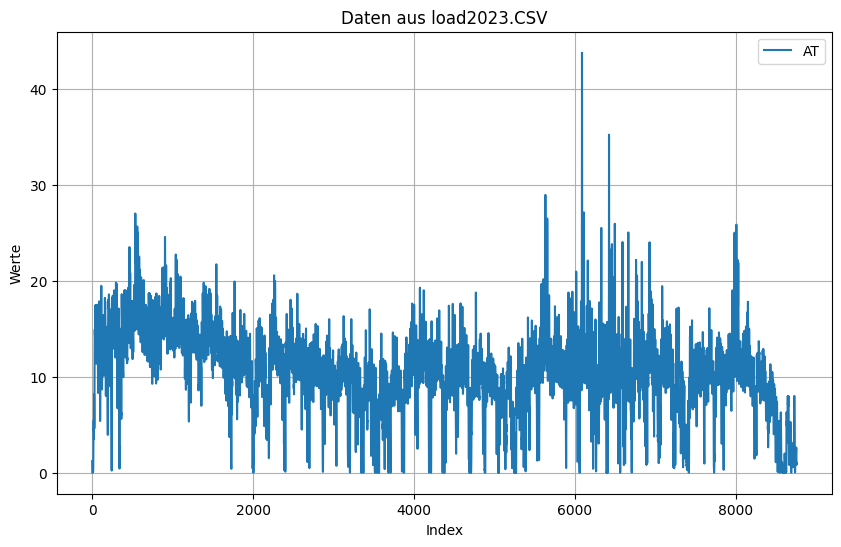

In [18]:
def csv_to_dataframe(file_path):
    """
    Liest eine CSV-Datei ein und wandelt sie in einen Pandas DataFrame um.

    Parameter:
    file_path (str): Der Pfad zur CSV-Datei.

    Rückgabe:
    pd.DataFrame: Der erstellte DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        df = df.clip(lower=0)
        print("CSV-Datei erfolgreich eingelesen!")
        return df
    except FileNotFoundError:
        print(f"Fehler: Datei '{file_path}' nicht gefunden.")
    except pd.errors.EmptyDataError:
        print("Fehler: Die Datei ist leer.")
    except pd.errors.ParserError:
        print("Fehler: Die Datei konnte nicht korrekt geparst werden.")

# Beispielaufruf
df_price = csv_to_dataframe("./preise2023.csv")
if df_price is not None:
    print(df_price)
       # Diagramm erstellen
    df_price.plot(figsize=(10, 6), title="Daten aus load2023.CSV")
    plt.xlabel("Index")
    plt.ylabel("Werte")
    plt.grid(True)
    plt.show()

In [19]:
def csv_to_dataframe_2(file_path):
    """
    Liest eine CSV-Datei ein und wandelt sie in einen Pandas DataFrame um.

    Parameter:
    file_path (str): Der Pfad zur CSV-Datei.

    Rückgabe:
    pd.DataFrame: Der erstellte DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        print("CSV-Datei erfolgreich eingelesen!")
        return df
    except FileNotFoundError:
        print(f"Fehler: Datei '{file_path}' nicht gefunden.")
    except pd.errors.EmptyDataError:
        print("Fehler: Die Datei ist leer.")
    except pd.errors.ParserError:
        print("Fehler: Die Datei konnte nicht korrekt geparst werden.")

# Beispielaufruf
df_load = csv_to_dataframe_2("./load2023.csv")
if df_load is not None:
    print(df_load)

CSV-Datei erfolgreich eingelesen!
        load
0     5280.8
1     5143.0
2     4958.7
3     4905.4
4     5025.8
...      ...
8755  6398.9
8756  6057.6
8757  6091.0
8758  5803.8
8759  5648.8

[8760 rows x 1 columns]


In [20]:
df = pd.concat([df_load, df_price], axis=1)
print(df)

        load     AT
0     5280.8  1.206
1     5143.0  0.000
2     4958.7  0.000
3     4905.4  0.000
4     5025.8  0.000
...      ...    ...
8755  6398.9  1.957
8756  6057.6  1.720
8757  6091.0  0.820
8758  5803.8  1.068
8759  5648.8  0.935

[8760 rows x 2 columns]


In [21]:
df['AT_change'] = df['AT'].pct_change() * 100  # Prozentuale Änderung des Strompreises
df['load_change'] = df['load'].pct_change() * 100  # Prozentuale Änderung der Last

# Berechnung der Preiselastizität
df['preis_elastizitaet'] = df['load_change'] / df['AT_change']
df['stunde'] = np.arange(1, 8761)

# Ausgabe des DataFrames mit der Preiselastizität
print(df[['load', 'AT', 'preis_elastizitaet','stunde']])

        load     AT  preis_elastizitaet  stunde
0     5280.8  1.206                 NaN       1
1     5143.0  0.000            0.026095       2
2     4958.7  0.000                 NaN       3
3     4905.4  0.000                 NaN       4
4     5025.8  0.000                 NaN       5
...      ...    ...                 ...     ...
8755  6398.9  1.957            0.213816    8756
8756  6057.6  1.720            0.440427    8757
8757  6091.0  0.820           -0.010537    8758
8758  5803.8  1.068           -0.155904    8759
8759  5648.8  0.935            0.214456    8760

[8760 rows x 4 columns]


In [22]:
# Unabhängige Variable (X) und abhängige Variable (Y)
X = df['load']
y = df['AT']

# Eine Konstante hinzufügen (Interzept für die lineare Regression)
X = sm.add_constant(X)

# Lineares Regressionsmodell erstellen
model = sm.OLS(y, X).fit()

# Ergebnisse ausgeben
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     AT   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     4030.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:46:09   Log-Likelihood:                -23655.
No. Observations:                8760   AIC:                         4.731e+04
Df Residuals:                    8758   BIC:                         4.733e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1444      0.199    -10.790      0.0